# Economic Model

### Economy-Wide
* $b$: benefits to be paid on monthly wages
* $f$: proportion of accumulated wages to be paid as firing fine
* $\beta$: intertemporal discounting factor

### Occupation-State-Year
* $k$: probationary contract structure (intervention); determines first and second probationary period cutoffs ($T_k^1$ and $T_k^2$)
* $y_0$: average match quality in pool of potential workers (net of wages)
* $\sigma^2_0$: variance of match quality in pool of potential workers
* $\sigma^2_*$: variance of signals on match quality

### Match-Specific
* $w$: monthly wage
* $h_0$: distribution of match quality in pool of potential workers
$$h_0=\mathcal{N}\left(y_0+\frac{w}{10},\sigma^2_0\right)$$
* $y_*$: true match quality (also the mean of signals on match quality)
$$y_*\sim \mathcal{N}\left(y_0+\frac{w}{10},\sigma^2_0\right)$$
* $t_*$: tenure when separation occurs (outcome)

### Evolving by Tenure
* $\xi$: signal about match quality observed by employer
$$\xi_t\sim\mathcal{N}\left(y_*,\sigma^2_*\right)$$
* $y$: mean of update to belief on match quality
$$y_t=\left[\frac{(t-1)\sigma^2_0+\sigma^2_*}{t\sigma^2_0+\sigma^2_*}\right]y_{t-1}+\left(\frac{\sigma^2_0}{t\sigma^2_0+\sigma^2_*}\right)\xi_t$$
* $\sigma^2$: variance of update to belief on match quality
$$\sigma^2_t=\frac{\sigma^2_0\sigma^2_*}{t\sigma^2_0+\sigma^2_*}$$
* $h$: distribution of match quality beliefs
$$h_t=\mathcal{N}\left(\mu_t,s^2_t\right)$$
where
$$\mu_t=\left(\frac{\sigma^2_0}{t\sigma^2_0+\sigma^2_*}\right)y_*+\left[\frac{(t-1)\sigma^2_0+\sigma^2_*}{t\sigma^2_0+\sigma^2_*}\right]y_{t-1}$$
$$s^2_t=\left(\frac{\sigma^2_0}{t\sigma^2_0+\sigma^2_*}\right)^{1/2}\sigma^2_*$$
* $R$: revenue generated by match
$$R_t=\xi_t-\frac{w}{10}$$
* $C$: cost of firing match
$$C_t= \underbrace{\mathbb{1}\{t\le T_k^1\}[0.5(T_k^1-t)w/10]}_{\text{First PP}} + \underbrace{\mathbb{1}\{T_k^1 < t\le T_k^2\}[0.5(T_k^2-t)w/10]}_{\text{Second PP}} + \underbrace{\mathbb{1}\{t> T_k^2\}\left[w\left(1+b+f\left(\frac{t+10}{10}\right)\right)\right]}_{\text{After Prob. Per.}}  $$
* $d$: firing decision (choice variable)
$$d_t\in\{0,1\}$$
* $\pi$: profits from current match
$$\pi_t=R_t-\mathbb{1}\{d_t=1\}C_t$$
* $V$: value function
$$V_t=\max\{\tilde{V}(d_t=1),\tilde{V}(d_t=0)\}$$
where
$$\tilde{V}(d_t=1)=[R_t-C_t]+\beta\mathbb{E}_{h_0}[V(y',0)]$$
$$\tilde{V}(d_t=0)=[R_t]+\beta\mathbb{E}_{h_t}[V(y',t+1)]$$
so that the firm fires at tenure $t$ (i.e., $d_t=1$) when
$$C_t\le\beta[\mathbb{E}_{h_0}[V(y_{0},0)]-\mathbb{E}_{h_t}[V(y_{t+1},t+1)]]$$
implying that $t_*$ is the lowest $t$ for which $d_t=1$

Note: the normality assumptions are necessary for applying the Kalman filter

Note: the functional form of revenue is irrelevant for the optimal firing decision

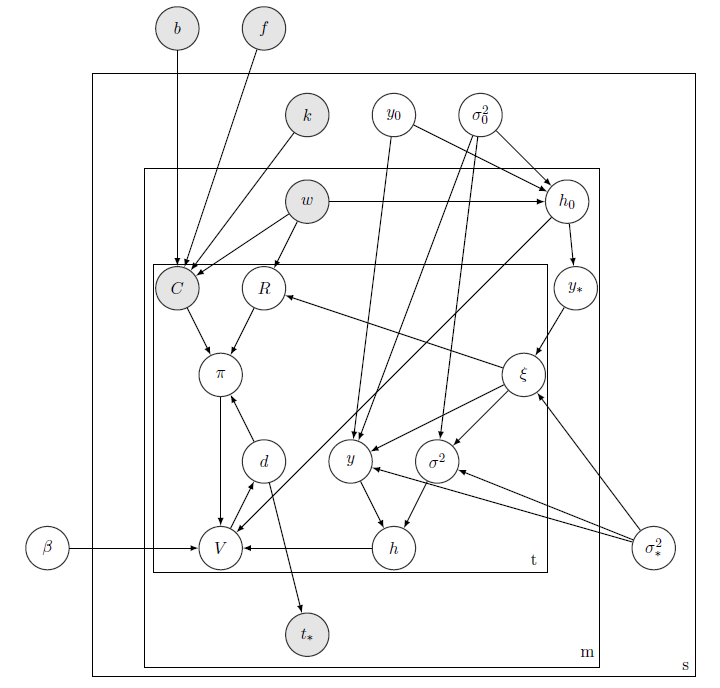

In [1]:
from IPython.display import Image
Image(filename='causalgraph3.png')

It is unclear to me whether this is a causal model or simply a flow diagram of the inputs and outputs.

First of all, I have parameters as nodes $(\beta,y_0,\sigma^2_0,\sigma^2_*)$. I think this is fine because they have an economic interpretation. Moreover, my goal is to estimate these parameters, so to some extent they can also be viewed as random variables.

Secondly, there is the cycle from profits $(\pi)$ to value function $(V)$ to firing decision $(d)$. However, the arrow from $d$ to $\pi$ mechanically exists but is not causal to the extent that the value function takes in profits under both states of the world ($d=0$ and $d=1$) to decide what the optimal firing decision is.

Finally, what I was unable to represent in causal model is the fact that the value function $(V_t)$ is solved with an iterative algorithm (VFI), and the updated beliefs about match quality $(y_t)$ is solved recursively.